# Assignment 4

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

This assignment requires that you to find **at least** two datasets on the web which are related, and that you visualize these datasets to answer a question with the broad topic of **sports or athletics** (see below) for the region of **Mont-Tremblant, Quebec, Canada**, or **Canada** more broadly.

You can merge these datasets with data from different regions if you like! For instance, you might want to compare **Mont-Tremblant, Quebec, Canada** to Ann Arbor, USA. In that case at least one source file must be about **Mont-Tremblant, Quebec, Canada**.

You are welcome to choose datasets at your discretion, but keep in mind **they will be shared with your peers**, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, bitbucket, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

Here are the assignment instructions:

 * State the region and the domain category that your data sets are about (e.g., **Mont-Tremblant, Quebec, Canada** and **sports or athletics**).
 * You must state a question about the domain category and region that you identified as being interesting.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

What do we mean by **sports or athletics**?  For this category we are interested in sporting events or athletics broadly, please feel free to creatively interpret the category when building your research question!

## Tips
* Wikipedia is an excellent source of data, and I strongly encourage you to explore it for new data sources.
* Many governments run open data initiatives at the city, region, and country levels, and these are wonderful resources for localized data sources.
* Several international agencies, such as the [United Nations](http://data.un.org/), the [World Bank](http://data.worldbank.org/), the [Global Open Data Index](http://index.okfn.org/place/) are other great places to look for data.
* This assignment requires you to convert and clean datafiles. Check out the discussion forums for tips on how to do this from various sources, and share your successes with your fellow students!

## Example
Looking for an example? Here's what our course assistant put together for the **Ann Arbor, MI, USA** area using **sports and athletics** as the topic. [Example Solution File](./readonly/Assignment4_example.pdf)

## Hypothesis

**Hypothesis:**

International ironman athletes performed better than canadian ironman athletes at the Mont-Tremblant 2018 Ironman.

**Explanations:**

Since they have to travel to Mont-Tremblant, Quebec, Canada, and incur more expenses for their participation, an assumption is made that international athletes will be more involved and more prepared in their ironman experience than their fellow canadian athletes. This reality will result in better performance.

**Methodology:**

Run a t-test to compare the rank of international athletes vs. canadian athletes by age group.

## Datasets

**Dataset 1**
- Ironman 2018 results in Mont-Tremblant per categories
- https://www.endurance-data.com/en/results/270-ironman-mont-tremblant/all/
    
**Dataset 2**
- Distance from Canada to other countries
- https://www.distancefromto.net/distance-from-canada-country
    
**Dataset 3**
- List of ISO 3166-1 alpha-3 country codes
- https://en.wikipedia.org/wiki/ISO_3166-1_alpha-3

**Explanations**

I have merged all the datasets using the Dataloader() class. It returns a single ironman dataframe, with columns added and merged from the other datasets.

In [2]:
%%javascript
// Disable scrolling
//    https://stackoverflow.com/questions/41641205/how-to-avoid-output-into-scrollable-frames-in-jupyter-notebook
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
import pandas as pd
import numpy as np

%load_ext nb_black

<IPython.core.display.Javascript object>

In [4]:
from src.dataloader import Dataloader

df = Dataloader().ironman
print(df.dtypes)
df.head()

Overall        int64
GenderRank     int64
DivRank        int64
Name          object
BIB            int64
AgeGroup      object
Alpha         object
Swim           int64
Bike           int64
Run            int64
Total          int64
Transition     int64
Country       object
Distance       int64
dtype: object


,Overall,GenderRank,DivRank,Name,BIB,AgeGroup,Alpha,Swim,Bike,Run,Total,Transition,Country,Distance
0,1,1,1,Cody Beals,8,MPRO,CAN,3155,15870,10161,29435,249,Canada,0
1,2,2,2,Lionel Sanders,1,MPRO,CAN,3307,16115,10550,30240,268,Canada,0
2,4,4,4,Antoine Jolicoeur Desroches,15,MPRO,CAN,3010,16519,10730,30519,260,Canada,0
3,5,5,1,Cedric Boily,537,M35-39,CAN,3108,16576,10623,30685,378,Canada,0
4,11,11,1,Nigel Gray,461,M45-49,CAN,3264,17223,11618,32463,358,Canada,0


<IPython.core.display.Javascript object>

## Visualizations

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib notebook

sns.set_style('darkgrid')
plt.style.use('seaborn-darkgrid')

/home/sugar/opt/coursera-adsum/.venv/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


<IPython.core.display.Javascript object>

### 1. AgeGroup pairplot

**Observations:**
- There is a linear relationship between DivRank and Total time.
- The Swim time seems to have a lesser impact than Bike or Run time on the DivRank.
- Distance seems to have no relationship with any particular columns. 
- Older people tend to travel less. (seen from Distance column)
- If you underperform in Swim/Bike/Run, your DivRank goes higher faster for the younger/more competitive categories.

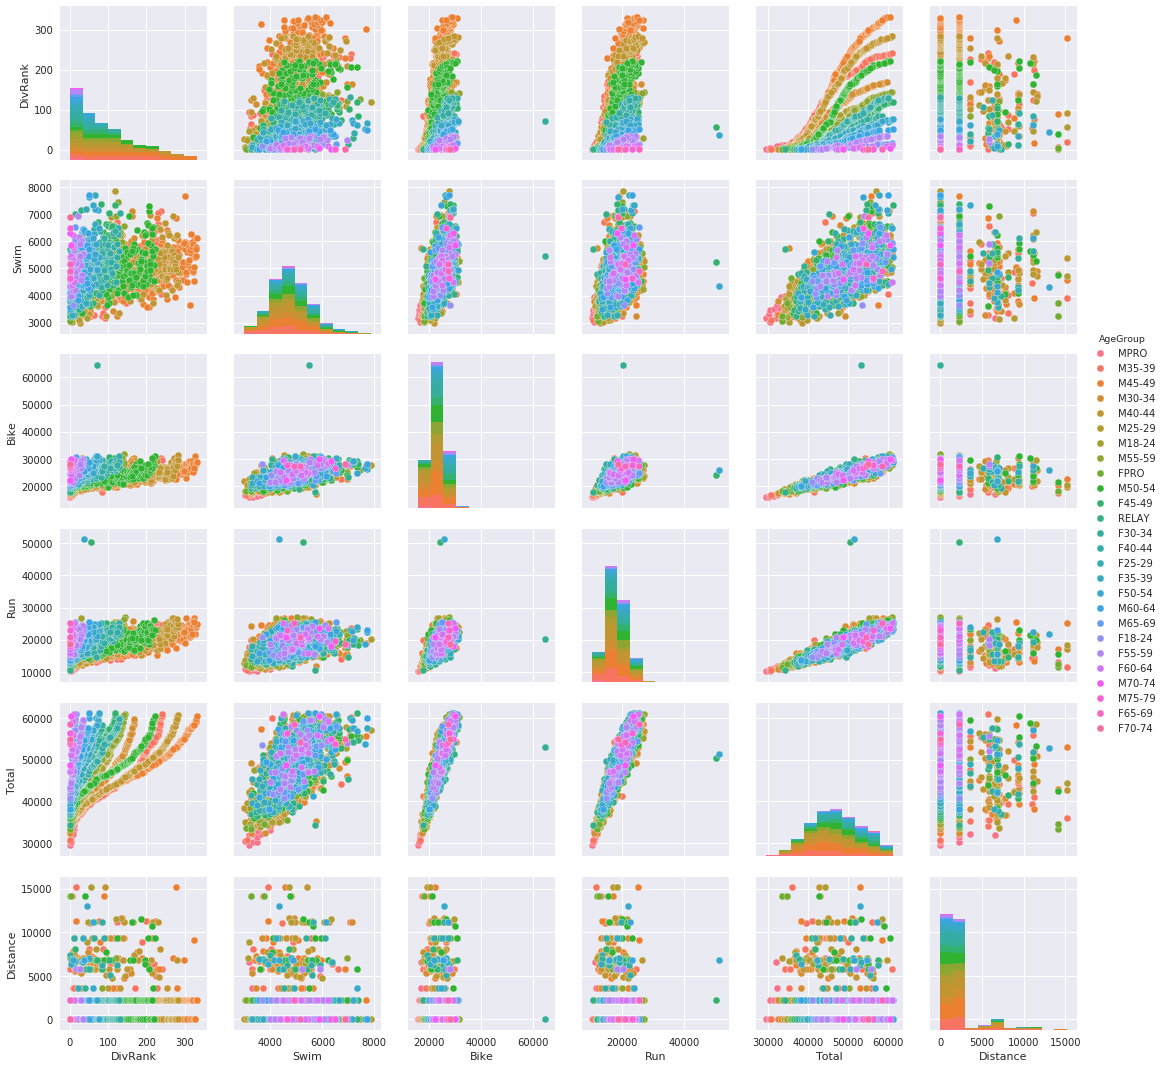

<IPython.core.display.Javascript object>

In [6]:
columns = ['AgeGroup', 'DivRank', 'Swim', 'Bike', 'Run', 'Total', 'Distance']
sns.pairplot(df[columns], hue='AgeGroup')

### 2. Top-5 countries piechart

**Observations:**


In [7]:
# TODO

<IPython.core.display.Javascript object>